# 1. Dataset Creation

This code is used to create our dataframe. We start with opening all the ESG Reports of the companies. Then to construct the dataset we need to extract the text from these file. In the final dataset we have three columns:

1) **Company**, the name of the corresponding company;

2) **Extracted_text**, the extracted text from the report;

3) **ESG risk rating**, the ESG risk rating from Sustanalytics.com


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")


!pip install pdfplumber

import os
import pandas as pd
import pdfplumber

def extract_text_from_pdf(pdf_path):
    """Extracts text from a PDF file using pdfplumber."""
    try:
        text = ""
        with pdfplumber.open(pdf_path) as pdf:
            for page in pdf.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text
        return text
    except Exception as e:
        print(f"Error extracting text from {pdf_path}: {e}")
        return None

def process_pdf_folder(folder_path):
    """Processes PDF files in a folder and creates a DataFrame."""
    data = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".pdf"):
            file_path = os.path.join(folder_path, filename)
            extracted_text = extract_text_from_pdf(file_path)
            company_name = filename.split("_")[0]
            data.append([filename, company_name, extracted_text])

    df = pd.DataFrame(data, columns=["File_name", "Company", "Extracted_text"])
    return df

# Folder with all the PDF reports
folder_path = "/content/drive/MyDrive/ESG Listed Companies Report"

# Process the folder and create the DataFrame
reports_df = process_pdf_folder(folder_path)
reports_df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


File_name  \
0                            FILA_2023_ESG_Report.pdf   
1                        Skechers_2023_ESG_Report.pdf   
2                        Columbia_2023_ESG_Report.pdf   
3                              VF_2023_ESG_Report.pdf   
4                             GAP_2023_ESG_Report.pdf   
5                            FILA_2022_ESG_Report.pdf   
6                        Skechers_2022_ESG_Report.pdf   
7                             GAP_2022_ESG_Report.pdf   
8                             FJR_2022_ESG_Report.pdf   
9                        Columbia_2022_ESG_Report.pdf   
10                   Boohoo_Group_2023_ESG_Report.pdf   
11              Asics_Corporation_2023_ESG_Report.pdf   
12              Asics_Corporation_2022_ESG_Report.pdf   
13                             VF_2022_ESG_Report.pdf   
14                   Boohoo_Group_2022_ESG_Report.pdf   
15  American Eagle Outfitters_(AEO)_2023_ESG_Repor...   
16                   Canada Goose_2023_ESG_Report.pdf   
17                    Foot Locker_2023_ESG_Report.pdf   
18                            FJR_2023_ESG_Report.pdf   
19                            H&M_2023_ESG_Report.pdf   
20                         Adidas_2023_ESG_Report.pdf   
21                           Nike_2023_ESG_Report.pdf   
22                         Adidas_2022_ESG_Report.pdf   
23                    Amer Sports_2023_ESG_Report.pdf   
24                    Amer Sports_2022_ESG_Report.pdf   
25  American Eagle Outfitters_(AEO)_2022_ESG_Repor...   
26                   Canada Goose_2022_ESG_Report.pdf   
27                    Foot Locker_2022_ESG_Report.pdf   
28                            H&M_2022_ESG_Report.pdf   
29                           Nike_2022_ESG_Report.pdf   
30                      Lululemon_2022_ESG_Report.pdf   
31                      Lululemon_2023_ESG_Report.pdf   
32                                  Carter's_2022.pdf   
33                                  Carter's_2023.pdf   
34                                     Crocs_2022.pdf   
35                                     Crocs_2023.pdf   
36                                     Guess_2022.pdf   
37                                     Guess_2023.pdf   
38                                      LVMH_2022.pdf   
39                                      LVMH_2023.pdf   
40                                       OVS_2022.pdf   
41                                       OVS_2023.pdf   
42                                   Deckers_2022.pdf   
43                                     Prada_2023.pdf   
44                                     Prada_2022.pdf   
45                                      Puma_2022.pdf   
46                                      Puma_2023.pdf   
47                                   Deckers_2023.pdf   
48                              Steve Madden_2023.pdf   
49                              Steve Madden_2022.pdf   
50                                     Capri_2022.pdf   
51                                     Capri_2023.pdf   
52                                       PVH_2023.pdf   
53                                       PVH_2022.pdf   
54                                 Richemont_2022.pdf   
55                                 Richemont_2023.pdf   
56                                 Hugo Boss_2022.pdf   
57                                 Hugo Boss_2023.pdf   
58                              Ralph Lauren_2023.pdf   
59                              Ralph Lauren_2022.pdf   

                      Company  \
0                        FILA   
1                    Skechers   
2                    Columbia   
3                          VF   
4                         GAP   
5                        FILA   
6                    Skechers   
7                         GAP   
8                         FJR   
9                    Columbia   
10                     Boohoo   
11                      Asics   
12                      Asics   
13                         VF   
14                     Boohoo   
15  American Eagle Outfitters   
16   

In [ ]:
# Group by the 'Company' column and concatenate the 'Extracted_text'
merged_df = reports_df.groupby('Company')['Extracted_text'].apply(lambda x: ' '.join(x)).reset_index()

In [ ]:
ratings_df = pd.read_csv("/content/drive/MyDrive/ESG Listed Companies Report/ESG_Ratings/ESG_Ratings.csv")

df = pd.merge(merged_df, ratings_df, on='Company', how='inner')

df.to_csv("/content/drive/MyDrive/ESG_Reports.csv", index=False)

df

Company  \
0                      Adidas   
1                 Amer Sports   
2   American Eagle Outfitters   
3                       Asics   
4                      Boohoo   
5                Canada Goose   
6                       Capri   
7                    Carter's   
8                    Columbia   
9                       Crocs   
10                    Deckers   
11                       FILA   
12                        FJR   
13                Foot Locker   
14                        GAP   
15                      Guess   
16                        H&M   
17                  Hugo Boss   
18                       LVMH   
19                  Lululemon   
20                       Nike   
21                        OVS   
22                        PVH   
23                      Prada   
24                       Puma   
25               Ralph Lauren   
26                  Richemont   
27                   Skechers   
28               Steve Madden   
29                         VF   

                                       Extracted_text  ESG risk rating  
0   2 0 2 3\nANNUAL REPORTANNUAL REPORT 2023\nY O ...             16.0  
1   S U S T A I N A B I L I T Y R E P O R TAMER SP...             10.3  
2   2023\nPROGRESS\nREPORTINTRODUCTION\nThe 2023 B...             15.2  
3   Sustainability\nReport\n2023Table of 3\nMessag...             18.6  
4   SUSTAINABILITY\nREPORT\n2023\nCOVER2023 Sustai...             35.1  
5   ENVIRONMENTAL, SOCIAL AND GOVERNANCE REPORT FY...             16.4  
6   2022 ANNUAL UPDATE\nCORPORATE\nSOCIAL\nRESPONS...             15.7  
7   2022 Corporate Social\nResponsibility ReportCo...             13.4  
8   T A L • SOCIAL •\nN G\nM E O\nV\nN E\nO R\nR N...             15.8  
9   Comfort\nReport\n2022\nConnecting\nthe Dots\nA...             16.0  
10  FOR THE REPORTING PERIOD APRIL 1, 2021 - MARCH...             14.2  
11  Overview About FILA FILA IMPACT FILA FOCUS Rep...             17.8  
12  SUSTAINABILITY & CSR\nANNUAL REVIEW 2022\nFrom...              9.1  
13  F Y2023\nIMPACT\nR E P O R T\nLACING UP\nWITH ...             16.0  
14  Gap Inc.\n2 02 3\nE S G R E P O R TCONTENTS\n3...             15.6  
15  Our best today, better tomorrow\nESG REPORT FI...             21.5  
16  H&M Group\nAnnual and Sustainability Report 20...             20.3  
17  SUSTAINABILITY\nREPORT\n2022Sustainability Rep...             12.4  
18  2 0 2 2 S O C I A L A N D E N V I R O N M E N ...             13.9  
19  Annual Report | 2022To our shareholders\n2022 ...             14.1  
20  MOVING\nTOGETHER\nFY23 NIKE, INC.\nIMPACT REPO...             18.4  
21  MAKING PROGRESS\nsustainability report 2022\nF...              9.1  
22  CORPORATE RESPONSIBILITY REPORT 2023Contents\n...             15.7  
23  33Letters to\nStakeholders\np. 4-9\nThe Prada ...             18.7  
24  Annual Report 2022Annual Report 2022 ↗ Table o...             17.5  
25  2023 GLOBAL CITIZENSHIP\n& SUSTAINABILITY REPO...             13.9  
26  SUSTAINABILITY\nREPORT\n2022\n1CONTENTS\nINTRO...             16.0  
27  OUR\nFOOTPRINT\nMATTERS\nS K E C H E R S I M P...             24.5  
28  SUSTAINABILITY REPORT 2023INTRODUCTION / LET’S...             17.8  
29  ENVIRONMENTAL & SOCIAL RESPONSIBILITY REPORT\n...             14.4

# 2. Data Import

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/ESG_Reports.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

Company  \
0                      Adidas   
1                 Amer Sports   
2   American Eagle Outfitters   
3                       Asics   
4                      Boohoo   
5                Canada Goose   
6                       Capri   
7                    Carter's   
8                    Columbia   
9                       Crocs   
10                    Deckers   
11                       FILA   
12                        FJR   
13                Foot Locker   
14                        GAP   
15                      Guess   
16                        H&M   
17                  Hugo Boss   
18                       LVMH   
19                  Lululemon   
20                       Nike   
21                        OVS   
22                        PVH   
23                      Prada   
24                       Puma   
25               Ralph Lauren   
26                  Richemont   
27                   Skechers   
28               Steve Madden   
29                         VF   

                                       Extracted_text  ESG risk rating  
0   2 0 2 3\nANNUAL REPORTANNUAL REPORT 2023\nY O ...             16.0  
1   S U S T A I N A B I L I T Y R E P O R TAMER SP...             10.3  
2   2023\nPROGRESS\nREPORTINTRODUCTION\nThe 2023 B...             15.2  
3   Sustainability\nReport\n2023Table of 3\nMessag...             18.6  
4   SUSTAINABILITY\nREPORT\n2023\nCOVER2023 Sustai...             35.1  
5   ENVIRONMENTAL, SOCIAL AND GOVERNANCE REPORT FY...             16.4  
6   2022 ANNUAL UPDATE\nCORPORATE\nSOCIAL\nRESPONS...             15.7  
7   2022 Corporate Social\nResponsibility ReportCo...             13.4  
8   T A L • SOCIAL •\nN G\nM E O\nV\nN E\nO R\nR N...             15.8  
9   Comfort\nReport\n2022\nConnecting\nthe Dots\nA...             16.0  
10  FOR THE REPORTING PERIOD APRIL 1, 2021 - MARCH...             14.2  
11  Overview About FILA FILA IMPACT FILA FOCUS Rep...             17.8  
12  SUSTAINABILITY & CSR\nANNUAL REVIEW 2022\nFrom...              9.1  
13  F Y2023\nIMPACT\nR E P O R T\nLACING UP\nWITH ...             16.0  
14  Gap Inc.\n2 02 3\nE S G R E P O R TCONTENTS\n3...             15.6  
15  Our best today, better tomorrow\nESG REPORT FI...             21.5  
16  H&M Group\nAnnual and Sustainability Report 20...             20.3  
17  SUSTAINABILITY\nREPORT\n20231 2 3 4 5\nDRIVING...             12.4  
18  2 0 2 2 S O C I A L A N D E N V I R O N M E N ...             13.9  
19  Annual Report | 2022To our shareholders\n2022 ...             14.1  
20  MOVING\nTOGETHER\nFY23 NIKE, INC.\nIMPACT REPO...             18.4  
21  MAKING PROGRESS\nsustainability report 2022\nF...              9.1  
22  CORPORATE RESPONSIBILITY REPORT 2023Contents\n...             15.7  
23  33Letters to\nStakeholders\np. 4-9\nThe Prada ...             18.7  
24  Annual Report 2022Annual Report 2022 ↗ Table o...             17.5  
25  2022\nGlobal Citizenship &\nSustainability Rep...             13.9  
26  SUSTAINABILITY\nREPORT\n2022\n1CONTENTS\nINTRO...             16.0  
27  OUR\nFOOTPRINT\nMATTERS\nS K E C H E R S I M P...             24.5  
28  SUSTAINABILITY REPORT 2023INTRODUCTION / LET’S...             17.8  
29  ENVIRONMENTAL & SOCIAL RESPONSIBILITY REPORT\n...             14.4

# Text Cleaning Explanation
This code defines a text preprocessing pipeline to clean and prepare the ESG report texts for analysis:

**Lowercasing & Stripping:**

Converts all text to lowercase and removes any leading or trailing whitespace.

**Line Breaks & Fixing Concatenated Words:**

Removes line breaks (\n) and adds a space between words that were accidentally merged (e.g., carbonFootprint → carbon Footprint).

**Removing Mentions & Hashtags:**

Deletes Twitter-style mentions (e.g., @company) and hashtags (e.g., #ESG) — although these are rarely present in ESG reports.

**Removing Punctuation & Special Characters:**

Cleans the text from punctuation and non-word characters to keep only meaningful words.

**Tokenization:**

Splits the text into individual words.

**Stopword Removal:**

Removes common English words like “the”, “and”, “is” that don't carry analytical value.

**Lemmatization:**

Converts words to their base form (e.g., “emissions” → “emission”) to standardize variations.

**Reconstruction:**

Joins the cleaned words back into a single string and saves it in a new column: Cleaned_text.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Define stopwords
stop = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()

def clean_text(text, company_name):
    text = str(text).lower().strip()
    company_name = company_name.lower()

    # Remove company-specific patterns
    patterns = [
        re.escape(company_name),
        re.escape(company_name.replace(" ", "")),
        re.escape(company_name.replace(" ", "-")),
        re.escape(company_name.replace(" ", "_")),
        re.escape(company_name + "2023"),
        re.escape(company_name + "2022"),
        re.escape(company_name + ".com"),
    ]
    pattern_regex = r'\b(' + '|'.join(patterns) + r')\b'
    text = re.sub(pattern_regex, '', text)

    # Normalize text
    text = re.sub(r'\n+', ' ', text)
    text = re.sub(r'([a-z])([A-Z])', r'\1 \2', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'[^\x00-\x7F]+', '', text)  # remove non-ASCII chars
    text = re.sub(r"[{}]".format(string.punctuation), ' ', text)  # remove punctuation
    text = re.sub(r'\s+', ' ', text)  # remove extra spaces

    # Tokenization and lemmatization
    tokens = word_tokenize(text)
    tokens = [
        lemmatizer.lemmatize(word)
        for word in tokens
        if word.isalpha() and word not in stop and len(word) > 2
    ]

    return ' '.join(tokens)

# Apply to DataFrame
df['Cleaned_text'] = df.apply(lambda row: clean_text(row['Extracted_text'], row['Company']), axis=1)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# ESG Keyword Feature Engineering Explanation
This section of code extracts quantitative metrics from the cleaned ESG reports based on predefined Environment, Social, and Governance (ESG) keyword lists:

## 1. ESG Keyword Dictionaries
The code defines three keyword sets:

- **Environment-related:** e.g., carbon, emission, sustainability, energy, co2

- **Social-related**: e.g., labor, inclusion, equality, gender, community

- **Governance-related:** e.g., board, ethics, compliance, audit, stakeholder

These are the core themes commonly addressed in sustainability reporting.

## 2. Keyword Count Function
The count_keywords function:

- **Splits each report into words**

- **Counts how many words match those in a given ESG keyword list**

## 3. Feature Calculation
For each company/report:

- **Total_words**: total number of words in the cleaned report

- **Env_count, Social_count, Gov_count**: number of matched ESG keywords by category

- **ESG_word_count**: total ESG-related words (sum of E + S + G counts)

## 4. Ratio Calculation
To normalize across different report lengths:

- **Env_ratio, Social_ratio, Gov_ratio**: proportion of each ESG category relative to total word count

- **Custom_ESG_Score**: weighted average for every elements (Env_ratio, Social_ratio, and Gov_ratio)

These ratios help compare companies regardless of report length and can be used as features in ESG risk modeling.

In [ ]:
# ESG Keyword Dictionary
env_keywords = ['environment', 'climate', 'carbon', 'emission', 'pollution', 'waste', 'energy', 'recycle', 'sustainability', 'co2', 'footprint', 'netzero', 'organic', 'raw', 'renewable', 'water', 'savings', 'ghg']
social_keywords = ['labor', 'diversity', 'inclusion', 'human', 'community', 'equality', 'rights', 'safety', 'health', 'gender', 'diversity', 'minority', 'employee', 'incident', 'injuries']
gov_keywords = ['governance', 'board', 'ethics', 'transparency', 'corruption', 'compliance', 'audit', 'stakeholder', 'bribery', 'shareholder', 'whistleblower']

# Function to count ESG words
def count_keywords(text, keywords):
    tokens = text.split()
    return sum(word in keywords for word in tokens)

# Feature calculation
df['Total_words'] = df['Cleaned_text'].apply(lambda x: len(x.split()))
df['Env_count'] = df['Cleaned_text'].apply(lambda x: count_keywords(x, env_keywords))
df['Social_count'] = df['Cleaned_text'].apply(lambda x: count_keywords(x, social_keywords))
df['Gov_count'] = df['Cleaned_text'].apply(lambda x: count_keywords(x, gov_keywords))

# Total ESG words
df['ESG_word_count'] = df['Env_count'] + df['Social_count'] + df['Gov_count']

#E ratio
df['Env_ratio'] = df['Env_count'] / df['Total_words']

#S ratio
df['Social_ratio'] = df['Social_count'] / df['Total_words']

#G ratio
df['Gov_ratio'] = df['Gov_count'] / df['Total_words']

#Custom ESG Score with balanced weights for every elements (same as one of the reading from the session)
w = 1/3
df['Custom_ESG_Score'] = df['Env_ratio']*w + df['Social_ratio']*w + df['Gov_ratio']*w


df.head()

Company  \
0                     Adidas   
1                Amer Sports   
2  American Eagle Outfitters   
3                      Asics   
4                     Boohoo   

                                      Extracted_text  ESG risk rating  \
0  2 0 2 3\nANNUAL REPORTANNUAL REPORT 2023\nY O ...             16.0   
1  S U S T A I N A B I L I T Y R E P O R TAMER SP...             10.3   
2  2023\nPROGRESS\nREPORTINTRODUCTION\nThe 2023 B...             15.2   
3  Sustainability\nReport\n2023Table of 3\nMessag...             18.6   
4  SUSTAINABILITY\nREPORT\n2023\nCOVER2023 Sustai...             35.1   

                                        Cleaned_text  Total_words  Env_count  \
0  annual reportannual report sannual report purp...       149353        926   
1  tamer sport sustainability report today managi...        26875       1294   
2  progress reportintroduction building better wo...        14555        444   
3  sustainability report message ceo content glan...        17366        819   
4  sustainability report sustainability report ba...        14825        582   

   Social_count  Gov_count  ESG_word_count  Env_ratio  Social_ratio  \
0           973       3166            5065   0.006200      0.006515   
1           582        464            2340   0.048149      0.021656   
2           239        191             874   0.030505      0.016420   
3           374        166            1359   0.047161      0.021536   
4           157        144             883   0.039258      0.010590   

   Gov_ratio  Custom_ESG_Score  
0   0.021198          0.011304  
1   0.017265          0.029023  
2   0.013123          0.020016  
3   0.009559          0.026085  
4   0.009713          0.019854

# Exploratory Data Analysis (EDA) Visualization Explanation
This code creates three key visualizations to help understand the relationship between ESG-related text features and the actual ESG risk ratings:

## 1. Scatter Plot: ESG Word Ratio vs ESG Risk Rating
What it does: Plots the ESG_word_ratio (how often ESG terms appear in a report) against the actual ESG risk rating.

Why it matters: Helps visualize any linear relationship between ESG disclosure and perceived ESG risk. A negative trend might suggest that companies who talk more about ESG tend to have lower risk ratings.

## 2. Word Cloud
What it does: Creates a visual cloud of the most frequent words across all cleaned ESG reports.

Why it matters: Offers an intuitive, visual summary of the main topics being emphasized across companies. Words that appear larger are used more often, potentially revealing recurring ESG themes like sustainability, inclusion, or energy.

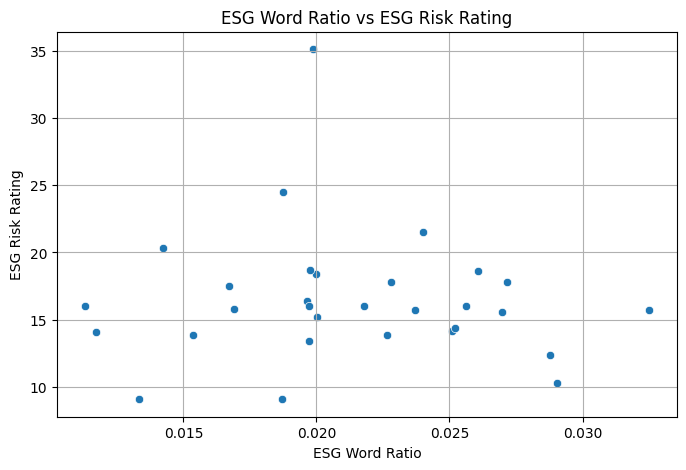

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Scatter plot: ESG word ratio vs ESG risk rating
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Custom_ESG_Score', y='ESG risk rating')
plt.title('ESG Word Ratio vs ESG Risk Rating')
plt.xlabel('ESG Word Ratio')
plt.ylabel('ESG Risk Rating')
plt.grid(True)
plt.show()

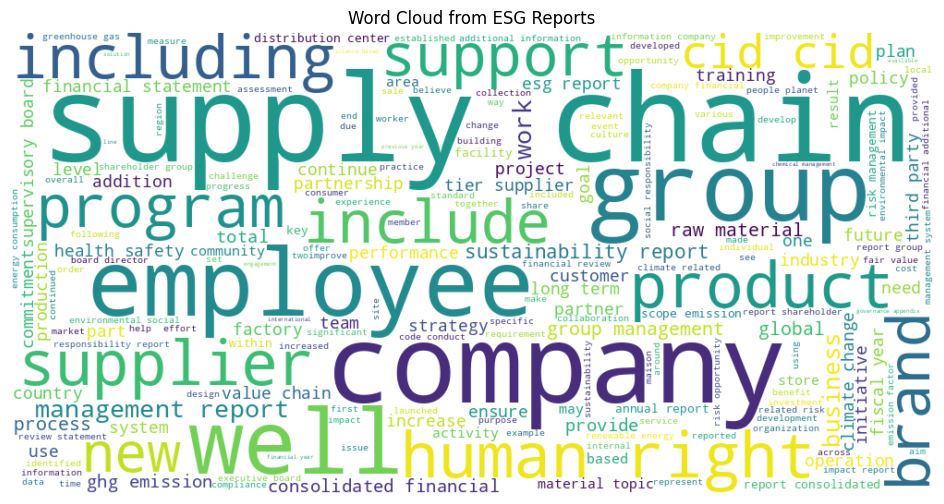

In [ ]:
# WordCloud: aggregate text from every report
text_corpus = " ".join(df['Cleaned_text'].astype(str))
wordcloud = WordCloud(width=1000, height=500, background_color='white', colormap='viridis').generate(text_corpus)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud from ESG Reports")
plt.show()

# Topic Modeling

In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1


In [ ]:
# Force reinstall all related packages to avoid binary mismatch
!pip install --upgrade --force-reinstall numpy pandas scipy scikit-learn gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 63.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
esg_stopwords = {
    'report', 'reporting', 'company', 'companies', 'year', 'data', 'information', 'statement',
    'impact', 'impacts', 'product', 'products', 'material', 'materials', 'include', 'includes',
    'including', 'used', 'use', 'provided', 'provide', 'providing', 'business', 'based',
    'management', 'practice', 'according', 'performed', 'activity', 'activities',
    'overview', 'description', 'group', 'organization', 'initiatives', 'developed',
    'development', 'performance', 'objective', 'objectives', 'strategic', 'process', 'processes',
    'approach', 'set', 'relevant', 'ensure', 'ensuring', 'inc', 'cid', 'esg'
}


stop.update(esg_stopwords)

def remove_esg_stopwords(text, stopwords):
    tokens = text.split()
    filtered_tokens = [word for word in tokens if word not in stopwords]
    return ' '.join(filtered_tokens)

df['Cleaned_text_filtered'] = df['Cleaned_text'].apply(lambda x: remove_esg_stopwords(x, esg_stopwords))

In [ ]:
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary
import matplotlib.pyplot as plt
import pandas as pd

# 1. Tokenize cleaned text
texts = df['Cleaned_text_filtered'].dropna().apply(lambda x: x.split()).tolist()

# 2. Create dictionary and corpus for Gensim
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

topic_range = range(3, 21)
coherence_scores = []
perplexity_scores = []
lda_models = {}

for n_topics in topic_range:
    lda_model = LdaModel(
        corpus=corpus,
        id2word=dictionary,
        num_topics=n_topics,
        random_state=42,
        passes=10,
        alpha='auto',
        per_word_topics=True
    )

    lda_models[n_topics] = lda_model

    topics = [[word for word, _ in lda_model.show_topic(i, topn=10)] for i in range(n_topics)]
    cm = CoherenceModel(topics=topics, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence = cm.get_coherence()
    coherence_scores.append(coherence)
    print(f"Topics: {n_topics} | Coherence: {coherence:.4f}")

Topics: 3 | Coherence: 0.4757


Topics: 4 | Coherence: 0.4677


Topics: 5 | Coherence: 0.4616


Topics: 6 | Coherence: 0.4954
Topics: 7 | Coherence: 0.5079
Topics: 8 | Coherence: 0.4836
Topics: 9 | Coherence: 0.4990
Topics: 10 | Coherence: 0.4613
Topics: 11 | Coherence: 0.4752
Topics: 12 | Coherence: 0.4741
Topics: 13 | Coherence: 0.4570
Topics: 14 | Coherence: 0.4619
Topics: 15 | Coherence: 0.4554
Topics: 16 | Coherence: 0.4595
Topics: 17 | Coherence: 0.4579
Topics: 18 | Coherence: 0.4705
Topics: 19 | Coherence: 0.4456
Topics: 20 | Coherence: 0.4521


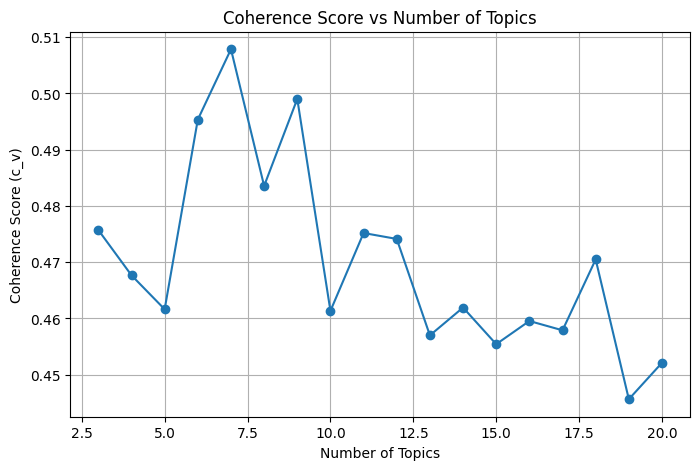

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(topic_range, coherence_scores, marker='o')
plt.title("Coherence Score vs Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score (c_v)")
plt.grid(True)
plt.show()

In [ ]:
best_n = topic_range[coherence_scores.index(max(coherence_scores))]
best_model = lda_models[best_n]

for idx, topic in best_model.show_topics(num_topics=best_n, num_words=10, formatted=False):
    print(f"\nTopic {idx}: {[word for word, _ in topic]}")


Topic 0: ['sustainability', 'risk', 'emission', 'production', 'also', 'store', 'total', 'employee', 'supplier', 'new']

Topic 1: ['financial', 'board', 'risk', 'million', 'asset', 'share', 'consolidated', 'value', 'cash', 'supplier']

Topic 2: ['responsibility', 'supplier', 'chain', 'supply', 'program', 'community', 'appendix', 'climate', 'social', 'risk']

Topic 3: ['sustainability', 'supplier', 'employee', 'chain', 'risk', 'emission', 'supply', 'environmental', 'social', 'water']

Topic 4: ['maisons', 'employee', 'environmental', 'social', 'supplier', 'program', 'people', 'commitment', 'responsibility', 'initiative']

Topic 5: ['program', 'supplier', 'emission', 'people', 'target', 'community', 'planet', 'employee', 'appendix', 'water']

Topic 6: ['emission', 'waste', 'employee', 'supplier', 'target', 'chain', 'global', 'sustainability', 'water', 'supply']


In [ ]:
doc_topics = []

for bow in corpus:
    topic_dist = best_model.get_document_topics(bow, minimum_probability=0.0)
    topic_vector = [prob for _, prob in sorted(topic_dist, key=lambda x: x[0])]
    doc_topics.append(topic_vector)

import pandas as pd

topic_df = pd.DataFrame(doc_topics, columns=[f"Topic_{i}" for i in range(best_n)])
topic_df

Topic_0       Topic_1       Topic_2   Topic_3       Topic_4  \
0   5.383276e-07  9.999956e-01  5.056056e-07  0.000001  3.061427e-07   
1   2.947726e-06  2.285602e-06  2.768550e-06  0.999369  1.676348e-06   
2   9.313799e-05  4.312457e-04  2.010805e-02  0.014042  3.039699e-06   
3   1.429649e-05  1.717366e-03  4.275787e-06  0.862179  2.588970e-06   
4   2.402581e-02  1.654088e-03  2.407137e-04  0.795488  2.985112e-06   
5   1.976573e-02  1.660156e-02  2.248802e-03  0.042612  5.527153e-04   
6   2.477975e-06  1.921368e-06  9.999802e-01  0.000005  1.409205e-06   
7   1.863980e-05  1.028629e-02  1.041407e-04  0.003553  1.704260e-06   
8   4.774002e-06  4.640260e-05  8.511199e-01  0.000849  2.714935e-06   
9   3.528082e-04  2.035163e-02  7.692423e-02  0.042853  4.699087e-01   
10  1.104171e-06  8.561511e-07  1.037055e-06  0.000002  6.279340e-07   
11  1.727414e-06  1.343052e-01  1.619764e-06  0.865059  9.807619e-07   
12  2.986177e-02  2.759096e-03  1.186297e-05  0.575029  7.182993e-06   
13  1.652420e-03  5.944324e-02  1.945761e-06  0.010919  1.178152e-06   
14  7.504009e-05  4.425688e-04  1.097633e-02  0.340314  8.518299e-07   
15  4.568444e-02  1.728566e-03  4.825308e-03  0.204576  3.086201e-04   
16  7.541715e-02  9.236915e-01  9.270203e-07  0.000876  5.613078e-07   
17  1.002309e-02  7.291710e-03  1.686555e-06  0.982141  1.021204e-06   
18  1.491906e-06  1.156791e-06  1.401221e-06  0.000003  9.999875e-01   
19  7.749259e-05  7.772793e-01  9.490655e-04  0.001609  9.770202e-07   
20  9.695455e-07  7.517643e-07  9.106118e-07  0.000002  5.513727e-07   
21  9.993566e-01  1.573263e-04  1.306762e-06  0.000479  7.912407e-07   
22  5.054677e-05  9.224430e-04  5.216362e-01  0.342900  1.153817e-06   
23  9.910023e-01  2.145575e-05  4.115624e-05  0.004425  8.803603e-07   
24  9.049135e-03  8.011759e-01  1.747750e-03  0.136320  3.953706e-07   
25  6.008485e-04  3.305755e-04  2.205236e-02  0.033474  1.055741e-06   
26  2.601065e-03  1.006468e-05  1.444160e-06  0.995461  1.819317e-03   
27  1.496654e-03  7.046010e-03  2.133475e-03  0.039103  3.580767e-06   
28  3.109183e-06  2.288583e-06  4.603357e-03  0.003973  1.678534e-06   
29  1.925753e-04  7.423866e-04  5.761379e-01  0.072164  1.334263e-06   

         Topic_5   Topic_6  
0   8.113099e-07  0.000001  
1   3.889952e-04  0.000232  
2   7.559067e-01  0.209416  
3   7.467088e-02  0.061411  
4   1.088186e-01  0.069770  
5   3.631048e-02  0.881908  
6   3.734526e-06  0.000005  
7   1.157250e-02  0.974463  
8   1.312269e-01  0.016750  
9   1.106135e-01  0.278996  
10  1.664064e-06  0.999992  
11  2.599156e-06  0.000629  
12  2.794119e-02  0.364390  
13  3.717821e-02  0.890804  
14  5.541098e-01  0.094081  
15  5.027527e-03  0.737850  
16  1.487539e-06  0.000012  
17  2.706339e-06  0.000539  
18  2.248427e-06  0.000003  
19  8.801750e-02  0.132067  
20  9.998387e-01  0.000156  
21  2.096909e-06  0.000003  
22  5.021529e-02  0.084275  
23  9.685205e-04  0.003540  
24  6.665058e-03  0.045042  
25  1.967137e-02  0.923870  
26  9.710035e-06  0.000098  
27  8.858750e-01  0.064342  
28  9.534355e-03  0.981882  
29  2.885617e-01  0.062200

In [ ]:
meta_topic_groups = {
    "Sustainability_Risk": ["Topic_3"],
    "Finance": ["Topic_1"],
    "Governance": ["Topic_4"],
    "Emissions": ["Topic_0", "Topic_6"],
    "Social_Goals": ["Topic_2"],
    "Supply_Chain": ["Topic_5"]
}

meta_topic_df = pd.DataFrame()

for meta_topic, topic_list in meta_topic_groups.items():
    meta_topic_df[meta_topic] = topic_df[topic_list].sum(axis=1)

df = pd.concat([df, meta_topic_df], axis=1)

df


Company  \
0                      Adidas   
1                 Amer Sports   
2   American Eagle Outfitters   
3                       Asics   
4                      Boohoo   
5                Canada Goose   
6                       Capri   
7                    Carter's   
8                    Columbia   
9                       Crocs   
10                    Deckers   
11                       FILA   
12                        FJR   
13                Foot Locker   
14                        GAP   
15                      Guess   
16                        H&M   
17                  Hugo Boss   
18                       LVMH   
19                  Lululemon   
20                       Nike   
21                        OVS   
22                        PVH   
23                      Prada   
24                       Puma   
25               Ralph Lauren   
26                  Richemont   
27                   Skechers   
28               Steve Madden   
29                         VF   

                                       Extracted_text  ESG risk rating  \
0   2 0 2 3\nANNUAL REPORTANNUAL REPORT 2023\nY O ...             16.0   
1   S U S T A I N A B I L I T Y R E P O R TAMER SP...             10.3   
2   2023\nPROGRESS\nREPORTINTRODUCTION\nThe 2023 B...             15.2   
3   Sustainability\nReport\n2023Table of 3\nMessag...             18.6   
4   SUSTAINABILITY\nREPORT\n2023\nCOVER2023 Sustai...             35.1   
5   ENVIRONMENTAL, SOCIAL AND GOVERNANCE REPORT FY...             16.4   
6   2022 ANNUAL UPDATE\nCORPORATE\nSOCIAL\nRESPONS...             15.7   
7   2022 Corporate Social\nResponsibility ReportCo...             13.4   
8   T A L • SOCIAL •\nN G\nM E O\nV\nN E\nO R\nR N...             15.8   
9   Comfort\nReport\n2022\nConnecting\nthe Dots\nA...             16.0   
10  FOR THE REPORTING PERIOD APRIL 1, 2021 - MARCH...             14.2   
11  Overview About FILA FILA IMPACT FILA FOCUS Rep...             17.8   
12  SUSTAINABILITY & CSR\nANNUAL REVIEW 2022\nFrom...              9.1   
13  F Y2023\nIMPACT\nR E P O R T\nLACING UP\nWITH ...             16.0   
14  Gap Inc.\n2 02 3\nE S G R E P O R TCONTENTS\n3...             15.6   
15  Our best today, better tomorrow\nESG REPORT FI...             21.5   
16  H&M Group\nAnnual and Sustainability Report 20...             20.3   
17  SUSTAINABILITY\nREPORT\n2022Sustainability Rep...             12.4   
18  2 0 2 2 S O C I A L A N D E N V I R O N M E N ...             13.9   
19  Annual Report | 2022To our shareholders\n2022 ...             14.1   
20  MOVING\nTOGETHER\nFY23 NIKE, INC.\nIMPACT REPO...             18.4   
21  MAKING PROGRESS\nsustainability report 2022\nF...              9.1   
22  CORPORATE RESPONSIBILITY REPORT 2023Contents\n...             15.7   
23  33Letters to\nStakeholders\np. 4-9\nThe Prada ...             18.7   
24  Annual Report 2022Annual Report 2022 ↗ Table o...             17.5   
25  2023 GLOBAL CITIZENSHIP\n& SUSTAINABILITY REPO...             13.9   
26  SUSTAINABILITY\nREPORT\n2022\n1CONTENTS\nINTRO...             16.0   
27  OUR\nFOOTPRINT\nMATTERS\nS K E C H E R S I M P...             24.5   
28  SUSTAINABILITY REPORT 2023INTRODUCTION / LET’S...             17.8   
29  ENVIRONMENTAL & SOCIAL RESPONSIBILITY REPORT\n...             14.4   

                                         Cleaned_text  Total_words  Env_count  \
0   annual reportannual report sannual report purp...       149353        926   
1   tamer sport sustainability report today managi...        26875       1294   
2   progress reportintroduction building better wo...        14555        444   
3   sustainability report message ceo content glan...        17366        819   
4   sustainability report sustainability report ba...        14825        582   
5   environmental social governance report report ...         5444        201   
6   annual update corporate social corporate socia...        31503        868   
7   corporate social responsibility reportcontents...  

## GRI Framework Score

##Justification of the GRI MetaTopic Weighting Scheme

The following document outlines the rationale used to assign weights to each GRI-related MetaTopic, as part of the `GRI_Score_weighted` metric designed to estimate a report’s coverage of material ESG themes.

###Objective

The goal is to develop a GRI-based score that reflects the **breadth and depth** of a report’s ESG disclosures, in alignment with globally recognized standards (GRI, TCFD, SASB), without using regression directly against the ESG risk score — preserving the metric for **predictive modeling**.


##Methodology: Expert-Informed Weighting

Each MetaTopic (derived via LDA topic modeling) is associated with a relevant GRI area. We assigned weights based on the **relative importance** of each GRI section in widely used ESG frameworks and materiality maps.

###Criteria used:
- **Coverage in GRI Universal Standards 2021**
- **Relevance in ESG Ratings** (Sustainalytics, MSCI, Refinitiv)
- **Materiality in sector-neutral ESG maps** (SASB, WEF, TCFD)
- **Impact on ESG risk exposure**, as defined by industry practice


## Weighting Table

| MetaTopic                 | Weight | Reasoning |
|--------------------------|--------|-----------|
| **Emissions**       | 1.4    | Climate change and carbon emissions are top-priority themes in all ESG risk models (GRI 305, TCFD-aligned disclosures). |
| **Governance**      | 1.1    | Governance and ethics are foundational to ESG risk: board structure, compliance, and anti-corruption are emphasized in GRI 102, 205, and 207. |
| **Social_Goals**    | 1.0    | Covers employment practices, diversity, health & safety (GRI 401–405), which are key to social performance. |
| **Sustainability_Risk** | 1.2 | Materiality analysis and sustainability risk disclosures are critical to ESG transparency and are central in GRI 3. |
| **Finance**         | 0.8    | Financial transparency is relevant (GRI 201, 207), but has lower weight unless tied directly to ESG metrics. |
| **Supply_Chain**    | 0.8    | Responsible sourcing and supplier evaluation (GRI 308, 414) are important, but considered indirect in many ESG risk scoring models. |


## Sources Consulted

1. **GRI Standards (2021 edition)**  
   → Especially GRI 1 (Foundation), GRI 2 (General Disclosures), GRI 3 (Material Topics), and sector-specific standards  
   ➤ [https://www.globalreporting.org/standards](https://www.globalreporting.org/standards)

2. **Sustainalytics ESG Risk Ratings Methodology**  
   ➤ [https://www.sustainalytics.com/esg-data/esg-risk-ratings](https://www.sustainalytics.com/esg-data/esg-risk-ratings)

3. **MSCI ESG Ratings Methodology**  
   ➤ [https://www.msci.com/our-solutions/esg-investing/esg-ratings](https://www.msci.com/our-solutions/esg-investing/esg-ratings)

4. **SASB Materiality Map**  
   ➤ [https://www.sasb.org/standards/materiality-map/](https://www.sasb.org/standards/materiality-map/)

5. **TCFD Recommendations**  
   ➤ [https://www.fsb-tcfd.org/recommendations/](https://www.fsb-tcfd.org/recommendations/)


## Final Note

This weighting system is meant to offer a **reasoned, interpretable, and data-driven starting point** for computing a GRI-based ESG score. The score can be used as a **standalone metric** or integrated as an **input feature** in broader ESG risk prediction models.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

gri_weights = {
    'Sustainability_Risk': 1.2,
    'Finance': 0.8,
    'Governance': 1.1,
    'Emissions': 1.4,
    'Social_Goals': 1.0,
    'Supply_Chain': 0.8
}

df['GRI_Score_weighted'] = sum(
    df[col] * weight for col, weight in gri_weights.items()
)

scaler = MinMaxScaler()
df['GRI_Score_norm'] = scaler.fit_transform(df[['GRI_Score_weighted']])


## 🟩 Greenwashing Score – Calculation and Interpretation
###Calculation:
The Greenwashing Score is computed as the ratio between the total number of words in a report and the number of quantitative elements (numerical values with units) found in the text.
Only numbers associated with meaningful units (e.g., %, tons, CO2, €) are counted to avoid including irrelevant values like page numbers or section headings.

### Interpretation:
This score estimates how narrative-heavy (vs data-driven) a report is.

🔺 **Higher** scores indicate a report filled with qualitative statements and few supporting metrics → potential greenwashing.

🔻 **Lower** scores suggest a report that provides more quantitative evidence, indicating greater transparency.

To make comparisons easier, the score is normalized between 0 and 1, where:

0 = highly quantitative report

1 = highly narrative and potentially greenwashed report

In [ ]:
def count_data_numbers(text):
    matches = re.findall(r'\b\d+(?:[\.,]\d+)?\s?(%|ton|kg|co2|€|million|billion|kwh|tco2e|mtco2e)?\b', str(text).lower())
    return sum(1 for m in matches if m)


df['Num_count'] = df['Extracted_text'].apply(count_data_numbers)

df['Greenwashing_Score'] = df['Total_words'] / (df['Num_count'] + 1)  # +1 to avoid division by 0

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['Greenwashing_Score_norm'] = scaler.fit_transform(df[['Greenwashing_Score']])


In [ ]:
df.columns

Index(['Company', 'Extracted_text', 'ESG risk rating', 'Cleaned_text',
       'Total_words', 'Env_count', 'Social_count', 'Gov_count',
       'ESG_word_count', 'Env_ratio', 'Social_ratio', 'Gov_ratio',
       'Custom_ESG_Score', 'Sustainability_Risk', 'Finance', 'Governance',
       'Emissions', 'Social_Goals', 'Supply_Chain', 'GRI_Score_weighted',
       'GRI_Score_norm', 'Num_count', 'Greenwashing_Score',
       'Greenwashing_Score_norm'],
      dtype='object')

# Models to predict actual ESG Scores


##Random Forest Regression and Feature Importance Analysis
In this section, we implemented a Random Forest Regressor to predict the ESG Risk Rating using three engineered features:

**Custom_ESG_Score**: A composite score based on text analysis of ESG topics,

**GRI_Score_norm**: A normalized score based on the presence of Global Reporting Initiative (GRI) indicators, and

**Greenwashing_Score_norm**: A normalized score reflecting the likelihood of greenwashing tactics in the report.

We configured the model with 50 trees (`n_estimators=50`), a maximum tree depth of 4, and a minimum of 2 samples per leaf. The model was trained using bootstrap sampling, enabling the calculation of an Out-of-Bag (OOB) score, which serves as an internal cross-validation metric.

After training, we evaluated model performance using three key metrics:

**Mean Absolute Error (MAE)** – measures average magnitude of prediction errors;

**Root Mean Squared Error (RMSE)** – penalizes larger errors more heavily;

**R² Score** – indicates the proportion of variance explained by the model.

Finally, we visualized feature importances to assess which inputs most influenced the model's predictions. The resulting bar plot highlights the relative contribution of each feature, providing interpretability and insights into which textual components best align with ESG risk assessments.

## Limitations and Analytical Usage

The Random Forest regression model developed here is trained on a very limited dataset (30 companies), using three engineered features: Custom_ESG_Score, GRI_Score_norm, and Greenwashing_Score_norm. While the model shows a relatively high R² on the training data, its Out-of-Bag (OOB) score remains negative, indicating poor generalization to unseen data. This is expected due to:

- **Small sample size**, which limits the model's learning capacity.

- **Low variance** of engineered features.

- **Noise and subjectivity** in ESG risk ratings that are difficult to capture with structured data alone.

Despite these limitations, the model retains value as an internal analytical tool. It should not be used to predict precise ESG risk ratings for new companies. Instead, its predictions and internal structure can support comparative ESG analysis in the following ways:

- **Relative Risk Ranking**: The predicted values can be used to rank companies internally based on model-estimated ESG risk, offering a consistent framework for comparison.

- **Understanding Feature Impact**: Feature importance scores from the model provide insight into which variables are driving ESG risk, helping identify key areas of focus (e.g., greenwashing behaviors vs. structured ESG disclosures).

- **Supporting Missing Rating Estimation**: For companies that lack official ESG ratings, this model can generate provisional ESG risk estimates, useful for benchmarking or exploratory analysis — as long as its limitations are acknowledged.

In summary, the model acts as a scoring framework rather than a forecasting tool, and its outputs are best interpreted in a relative and qualitative context, especially when integrated with expert judgment or additional qualitative ESG assessment.



##Correlation Heatmap
**What it does:**

Calculates the pairwise correlations between numerical variables, including total ESG words, environmental/social/governance keyword counts, their ratios, and the ESG risk rating.

**Why it matters:**

This heatmap shows which text-based features are most strongly correlated with the ESG risk score. For example, if ESG_word_ratio has a strong negative correlation with the rating, it may indicate that higher ESG disclosure is associated with lower (better) ESG risk.

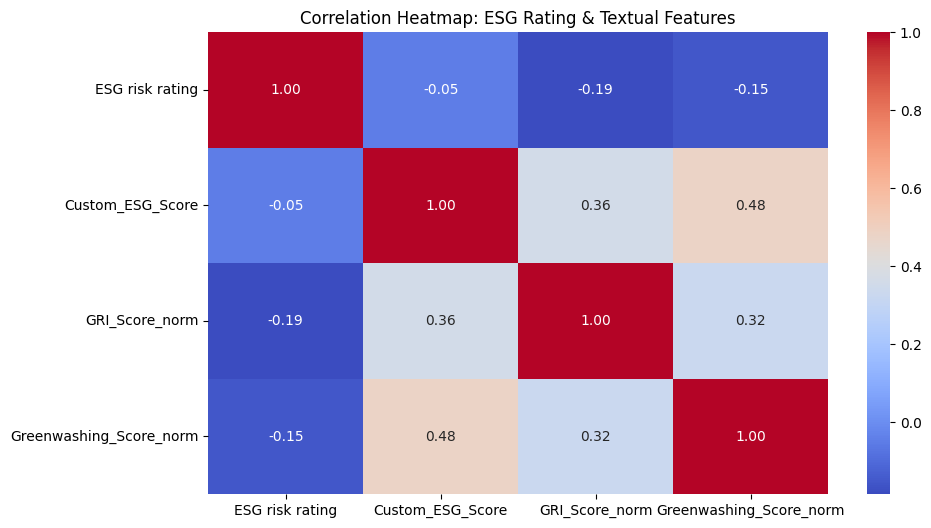

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Heatmap delle correlazioni
correlation_vars = ['ESG risk rating', 'Custom_ESG_Score', 'GRI_Score_norm', 'Greenwashing_Score_norm']

corr_matrix = df[correlation_vars].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: ESG Rating & Textual Features")
plt.show()

In [ ]:
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Feature matrix
X = df[['Custom_ESG_Score', 'GRI_Score_norm', 'Greenwashing_Score_norm']]

y = df['ESG risk rating']

model = RandomForestRegressor(
    n_estimators=50,
    max_depth=4,
    min_samples_leaf=2,
    oob_score=True,
    bootstrap=True,
    random_state=42
)

model.fit(X, y)

print("OOB Score:", model.oob_score_)
y_pred_rf = model.predict(X)
df['y_pred'] = y_pred_rf
print("MAE:", mean_absolute_error(y, y_pred_rf))
print("RMSE:", mean_squared_error(y, y_pred_rf)**(1/2))
print("R²:", r2_score(y, y_pred_rf))

OOB Score: -0.2186148865366928
MAE: 1.8660422715247718
RMSE: 2.9313953969040507
R²: 0.6181954895135808


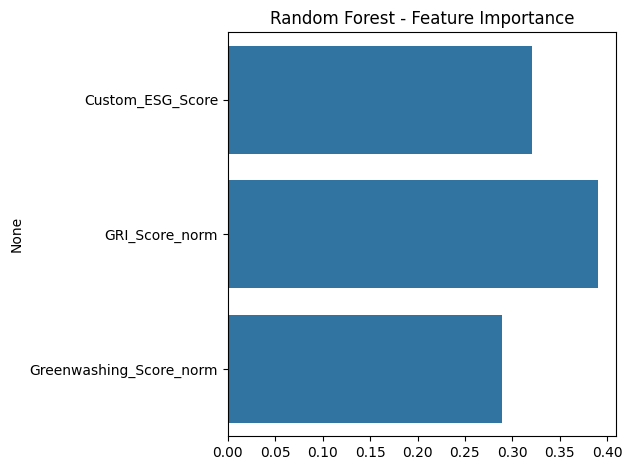

In [ ]:
import seaborn as sns

importances = model.feature_importances_
features = X.columns

sns.barplot(x=importances, y=features)
plt.title("Random Forest - Feature Importance")
plt.tight_layout()
plt.show()


In [ ]:
# Select the desired columns
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]
# Instead of using '+' for concatenation, use '.join()'
final_df = df[['Company']].join(df_numeric)

# Save the DataFrame as a CSV file
final_df.to_csv('/content/drive/MyDrive/final_dataframe.csv', index=False)